In [ ]:
## Extension of: https://github.com/dtnewman/stochastic_gradient_descent/blob/master/stochastic_gradient_descent.ipynb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from functools import reduce

In [ ]:
#### The basic gradient descent ####

In [ ]:
## lets take a function
f = lambda x: 2*x**3 - 3*x +1 #x**3-2*x**2+2 ## 2x^3 - 3x + 1

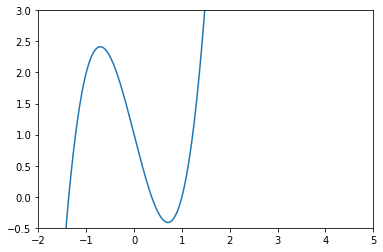

In [ ]:
## lets make some data and visualize the function
### x = -2, x = 5, 1000 points
x = np.linspace(-2,5,1000)
#print(x)
plt.plot(x,f(x))
plt.xlim([-2,5])
plt.ylim([-0.5,3])
plt.show()

In [ ]:
## get the derivative of the f w.r.t x
fprime = lambda x: 6*x**2 - 3 ## 6x^2 - 3

In [ ]:
x_old = 0.0 ## -1.0 ## 0.9
x_new = 1.0 ## -0.9 ## 1.0
alpha = 0.1 ## 0.01
precision = 0.0001

x_list, y_list = [x_old, x_new], [f(x_old), f(x_new)]
#print(y_list)
## until the step difference becomes less than the precision.
i = 0
while abs(x_list[i] - x_list[i+1]) > precision:
#for i in range(10):
    print("Error:", abs(x_list[i] - x_list[i+1]))
    #print(x_new - x_init)
    print(x_new)
    print(fprime(x_new))
    #print(abs(x_new - x_old))
    ## parameter_new = parameter_old - 0.01 * df/dparameter
    x_new = x_old - alpha * fprime(x_new)
    
    print()
    x_old = x_new
    #print(fprime(x_new))
    x_list.append(x_new)
    y_list.append(f(x_new))
    i += 1

Error: 1.0
1.0
3.0

Error: 1.3
-0.30000000000000004
-2.46

Error: 0.246
-0.05400000000000005
-2.982504

Error: 0.2982504
0.24425039999999998
-2.6420504525990403

Error: 0.26420504525990396
0.5084554452599039
-1.4488383611133169

Error: 0.1448838361113317
0.6533392813712356
-0.4388867005039043

Error: 0.04388867005039043
0.6972279514216261
-0.08323910253841582

Error: 0.008323910253841604
0.7055518616754677
-0.013179422917690253

Error: 0.0013179422917690697
0.7068698039672368
-0.0020104814359216405

Error: 0.00020104814359211964
0.7070708521108289
-0.0003048605715982866



In [ ]:
print("Number of iterations: {}".format(len(x_list)))
print("Local minimum: {}".format(x_new))

Number of iterations: 12
Local minimum: 0.7071013381679887


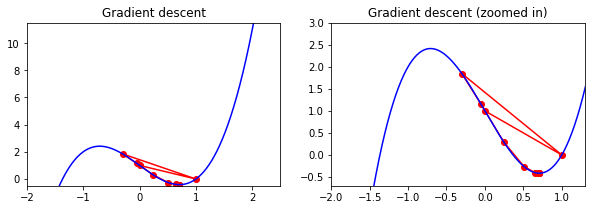

In [ ]:
## Plot how x was stepping towards the local minima
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-2,2.5])
plt.ylim([-0.5,11.5])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-2,1.3])
plt.ylim([-0.7,3])
plt.title("Gradient descent (zoomed in)")
plt.show()

In [ ]:
#### Simple function optimization ####

In [ ]:
## a simple linear regression model
model = lambda theta_1, theta_2, x: theta_1 + theta_2 * x ## y = theta_1 + theta_2 * x
#def model(theta_1, theta_2, x):
#  return theta_1 + theta_2 * 2
## cost function (MSE)
mse = lambda n, x, y, theta_1, theta_2: (1 / n)*(model(theta_1, theta_2, x) - y) ** 2 # L = 1/number_of_samples * (y_hat - y) ^ 2

## Partial derivative w.r.t thetas
## L = 1/number_of_samples * (y_hat - y) ^ 2
## L = 1/number_of_samples * (theta_1 + theta_2 * x - y) ^ 2 -> 2 / num_of_samples * (theta_1 + theta_2 * x - y) * 1 + 0 
prime_mse_theta_1 = lambda n, y, x, theta_1, theta_2: (2 / n) * (model(theta_1, theta_2, x) - y) #  2/number_of_samples * (y_hat - y)
prime_mse_theta_2 = lambda n, y, x, theta_1, theta_2: (2 / n) * (model(theta_1, theta_2, x) - y) * x # 2/number_of_samples * (y_hat - y) * x

In [ ]:
## lets make some data
## linear data generation
data_function = lambda x: 2 * x + np.random.uniform(0, 1) ## 2x + U(0, 1)
#data = np.random.normal(size=100)
x_vals = np.arange(0, 1, 0.01) ## x=0, x=1
#print(x_vals)
y_vals = list(map(data_function, x_vals))
#print(y_vals)

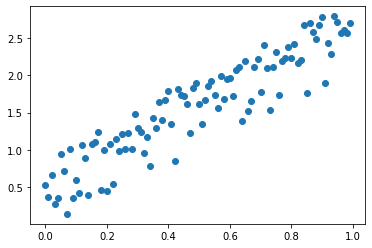

In [ ]:
plt.scatter(x_vals, y_vals)

100


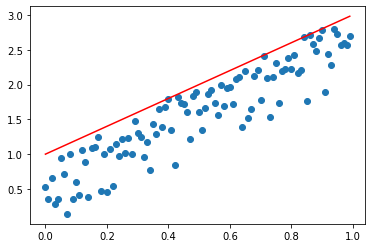

In [ ]:
## some initial parameters
theta_1_old = 0
theta_1_new = 1
theta_2_old = 0
theta_2_new = 2

n = len(x_vals)
print(n)
learning_rate = 0.001
precision = 0.001
#print([theta_1_new]*n)
#print(list(map(lambda x: 2*x, [theta_1_new]*n)))
#print(reduce(lambda x, y: 2*x+y, [theta_1_new]*n))
## Initial model behaviour
plt.scatter(x_vals, y_vals)
y_pred = list(map(model, [theta_1_new]*n, [theta_2_new]*n, x_vals))

y = y_vals[0]
x = x_vals[0]

#print(y_pred)
#print(y)
#print(y_vals)
plt.plot(x_vals, y_pred, 'r')

In [ ]:
#print(mse(n, x, y, theta_1_new, theta_2_new))
#print(list(map(mse, [n]*n, x_vals, y_vals, [theta_1_new]*n, [theta_2_new]*n)))
print("Initial MSE:",reduce(lambda x, y: x + y, list(map(mse, [n]*n, x_vals, y_vals, [theta_1_new]*n, [theta_2_new]*n))))

for i in range(1000):
    #print(mse(x, y, theta_1_new, theta_2_new))
    #print(reduce(lambda x, y: x + y, list(map(mse, [n]*n, x_vals, y_vals, [theta_1_new]*n, [theta_2_new]*n))))
    ## assign the old thetats
    theta_1_old = theta_1_new
    theta_2_old = theta_2_new
    ## get the new thetas
    grad_theta_list_1 = list(map(prime_mse_theta_1, [n]*n, y_vals, x_vals, [theta_1_old]*n, [theta_2_old]*n))
    grad_theta_1 = reduce(lambda x, y: x + y, grad_theta_list_1)
    theta_1_new = theta_1_old - learning_rate * grad_theta_1
    
    grad_theta_list_2 = list(map(prime_mse_theta_2, [n]*n, y_vals, x_vals, [theta_1_old]*n, [theta_2_old]*n))
    grad_theta_2 = reduce(lambda x, y: x + y, grad_theta_list_2)
    theta_2_new = theta_2_old - learning_rate * grad_theta_2
    
    y_pred = list(map(model, [theta_1_new]*n, [theta_2_new]*n, x_vals))

print("New MSE:",reduce(lambda x, y: x + y, list(map(mse, [n]*n, x_vals, y_vals, [theta_1_new]*n, [theta_2_new]*n))))
print("Optimised theta-1:", theta_1_new)
print("Optimised theta-2:", theta_2_new)

Initial MSE: 0.23621178239505833
New MSE: 0.08042868043907701
Optimised theta-1: 0.6915185711136741
Optimised theta-2: 1.8956638450627077


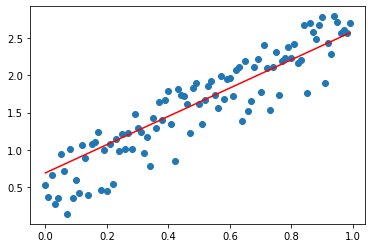

In [ ]:
plt.scatter(x_vals, y_vals)
y_pred = list(map(model, [theta_1_new]*n, [theta_2_new]*n, x_vals))
#print(y_pred)
plt.plot(x_vals, y_pred, 'r')